# Интернет-магазин «В один клик» 

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Оглавление
1. [Цели и задачи проекта](#Цели-и-задачи-проекта)
2. [Импорт библиотек и загрузка данных](#Импорт-библиотек-и-загрузка-данных)
3. [Общая информация о данных](#Общая-информация-о-данных)
4. [Предобработка данных](#Предобработка-данных)
5. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
7. [Объединение таблиц](#Объединение-таблиц)
6. [Корреляционный анализ](#Корреляционный-анализ)
7. [Использование пайплайнов](#Использование-пайплайнов)
8. [Анализ важности признаков](#Анализ-важности-признаков)
9. [Сегментация покупателей](#Сегментация-покупателей)
9. [Общий вывод](#Общий-вывод)

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Цели и задачи проекта

[К оглавлению](#Оглавление)

**Целью** проекта является разработка решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

В рамках достижения целей проекта должны быть решены следующие **задачи**:
1. Исследовать общую информацию о данных
2. Выполнить предобработку данных:
    - Обработка пропущенных значений
    - Обработка неявных дубликатов
    - Обработка явных дубликатов
    - Изменение типов данных
    - Выявление и обработка аномальных значений
3. Выполнить исследовательский и статистический анализ данных
4. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
5. Нужно собрать данные по клиентам по следующим группам:
    -   Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    -   Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    -   Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    -   Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.    
6. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
7. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
8. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Исходные данные:
- market_file.csv
- market_money.csv
- market_time.csv
- money.csv

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Импорт библиотек и загрузка данных

[К оглавлению](#Оглавление)


Установка библиотек

In [1]:
!pip install -q  phik 

In [2]:
!pip install -q -U scikit-learn

In [3]:
!pip install -q shap 

Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
#Оценка permutation importance
from sklearn.inspection import permutation_importance

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    RocCurveDisplay 
)
from sklearn.svm import SVC

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import phik
from scipy import stats as st
from IPython.display import display
from sklearn.model_selection import train_test_split 


from math import (
    factorial,
    ceil
)

from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

Загрузка данных

In [5]:
df_market_file = pd.read_csv('/datasets/market_file.csv',decimal=",", sep=',')
df_market_money = pd.read_csv('/datasets/market_money.csv',decimal=",", sep=',')
df_market_time = pd.read_csv('/datasets/market_time.csv',decimal=",", sep=',')
df_money = pd.read_csv('/datasets/money.csv',decimal=",", sep=';')

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Функции, используемые в проекте

[К оглавлению](#Оглавление)

### Функция форматирования таблиц

In [6]:
def nice_t(data):
    
    #Функция для форматирования вывода таблиц
    th_props = [
      ('font-size', '11px'),
      ('text-align', 'center'),
      ('font-weight', 'bold'),
      ('color', 'black'),
      ('background-color', '#40E0D0')
      ]
    td_props = [
      ('font-size', '12px'),
      ('text-align', 'center')
      ]
    tr_props = [
      ('background-color', '#40E0D0'),
      ('text-align', 'center')  
        ]
    tr_nth_child_props = [
      ('background-color', '#CFECEC')  
        ]

    styles = [
      dict(selector="th", props=th_props),
      dict(selector="td", props=td_props),
      dict(selector="tr:nth-child(even)", props=tr_nth_child_props),
      dict(selector="tr:hover", props=tr_props)  
      ]
    display(data.style.set_table_styles(styles))

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Функция вывода информации о датафрейме

In [7]:
def data_info (data, figsize_x, figsize_y):
    
    '''
    Функция выводит основную информацию о датафрейме
    в удобном формате
    '''
    print('\nОбщая информация о датафрейме .head()\n')
    nice_t(data.head(15))
    print('\nОбщая информация о датафрейме .info()\n')
    display(data.info())
    print('\nОбщая информация о датафрейме .describe()\n')
    print('\nКоличество пропусков в датафрейме\n', data.isna().sum())
    print('\nСоотношение пропусков в датафрейме, %\n', round(data.isna().sum() / len(data) * 100, 2))
    nice_t(data.describe())
    print('\nОбщая информация о датафрейме .hist()\n')
    try:
        data.hist(color='#000080',bins=50, figsize=(figsize_x, figsize_y))
        plt.show()
    except: 
        print('Построение гистограммы невозможно. Отсутствуют подходящие данные')

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Функция вывода круговых диаграмм категориальных данных

In [8]:
def data_category_analyze(data, exclude_col, labels):
    
    #Функция выводит круговые диаграммы по категориям

    #создадим датафрейм без столбцов exclude_col
    try:
        data_excluded = data.drop(exclude_col, axis=1)
    except:
        print('Не обнаружено столбцов для исключения')
        data_excluded = data
    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data.columns.to_list())
    df_labels.loc[len(df_labels)] = labels

    #задаём количество строк и столбцов в subplots
    ncols = 3
    # расчет количества строк
    nrows = len(data_excluded.select_dtypes(exclude={'int64', 'float64'}).columns) // ncols + \
           (len(data_excluded.select_dtypes(exclude={'int64', 'float64'}).columns) % ncols > 0)
    #цикл для вывода круговых диаграмм
    plt.figure(figsize=(15, 10))
    for num, column in enumerate(data_excluded.select_dtypes(exclude={'int64', 'float64'})):
        ax = plt.subplot(nrows, ncols, num + 1)
        pivot_table = data.pivot_table(index=column, values='id', aggfunc=['count'])
        pivot_table.columns = [column]
        pivot_table.plot(kind='pie',
                         y=column,
                         title=f'Распределение по {column}',
                         labels = pivot_table.index,
                         colors=sns.color_palette('Accent'),
                         ylabel='',
                         legend=False,
                         radius=1,
                         autopct='%.1f%%',
                         textprops={'size': 'medium'},
                         ax=ax)     
    plt.tight_layout()
    plt.show()

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Функция анализа числовых данных

In [9]:
def data_numbers_analyze(data, exclude_col, x_labels, y_labels, figsize_x, figsize_y):
    
    '''
    Функция выводит общую информацию о датафрейме(describe)
    Выводит диаграммы размаха с группировкой по категориям

    '''
    #создадим датафрейм без столбцов exclude_col
    data_excluded = data.drop(exclude_col, axis=1)
    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data.columns.to_list())
    df_labels.loc[len(df_labels)] = x_labels
    df_labels.loc[len(df_labels)] = y_labels
    #создадим цикл для вывода информации
    print ('\nИсследование числовых значений\n')
    print('\nОбщая информация о данных (describe)\n')
    nice_t(data_excluded.describe())
    
    #задаём количество строк и столбцов в subplots
    ncols = 3
    # расчет количества строк
    nrows = len(data_excluded.select_dtypes(include={'int64', 'float64'}).columns) // ncols + \
           (len(data_excluded.select_dtypes(include={'int64', 'float64'}).columns) % ncols > 0)
    #цикл для вывода круговых диаграмм
    plt.figure(figsize=(figsize_x, figsize_y))
    for num, column in enumerate(data_excluded.select_dtypes(include={'int64', 'float64'})):
        ax = plt.subplot(nrows, ncols, num + 1)
        sns.set_style("darkgrid")
        boxplot = sns.boxplot(y=data_excluded[column], ax=ax, width=0.3)
        boxplot.axes.set_title(f"Диаграмма размаха {df_labels[column].values[0]}", fontsize=10)
        boxplot.set_xlabel(df_labels[column].values[0], fontsize=10)
        boxplot.set_ylabel(df_labels[column].values[1], fontsize=10)   
    plt.tight_layout()
    plt.show()

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Функция вывода гистограммы распределения числовых значений

In [10]:
def data_hist_analyze(data, exclude_col, x_labels, y_labels):
  
    '''
    Функция выводит гистограммы
    Для статистической проверки принадлежности нормальному распределению применим тест Шапиро-Уилка. 
    Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, 
    выборка x которой известна, распределена по нормальному закону. Альтернативная гипотеза H1 заключается в том,
    что закон распределения не является нормальным. 
    Величина близкая к 1 означает, что распределение близко к нормальному
    '''    
    #создадим датафрейм без столбцов exclude_col
    data_excluded = data.drop(exclude_col, axis=1)
    #создадим датафрейм с наименованиями labels
    df_labels = pd.DataFrame(columns=data.columns.to_list())
    df_labels.loc[len(df_labels)] = x_labels
    df_labels.loc[len(df_labels)] = y_labels

    #создадим цикл для оценки распределения числовых данных при помощи histplot
          
    for j in data_excluded.select_dtypes(include={'int64', 'float64'}):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
        sns.set_style("darkgrid")
        histplot = sns.histplot(data=data_excluded, x=j, color="blue", label=j, kde='true', bins='auto')
        histplot.axes.set_title(f'Гистограмма распределения {df_labels[j].values[0]}', fontsize=10)
        histplot.set_xlabel(df_labels[j].values[0], fontsize=10)
        histplot.set_ylabel('Кол-во', fontsize=10)
        plt.show()
        stat, p = st.shapiro(data_excluded[j])
        print('stat=%.3f, p=%.3f\n' % (stat, p))
        if p > 0.05:
            print('Вероятно, распределение нормальное (Гауссово)')
        else:
            print('Вероятно, распределение не нормальное (не Гауссово)')

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Константы

[К оглавлению](#Оглавление)

In [11]:
# создание константы RANDOM_STATE
# константа используется для моделей машинного обучения
# чтобы при каждом перезапуске блокнота датасет делился на выборки одинаково.
RANDOM_STATE = 42
#размер тестовой выборки
TEST_SIZE = 0.25

In [12]:
#Наименования столбцов для графиков
#df_market_file

market_file_x_labels = ['Идентификатор',
                        'Покупательская активность',
                        'Тип сервиса',
                        'Разрешить сообщать',
                        'Маркет актив 6 мес',
                        'Маркет актив тек. мес.',
                        'Длительность',
                        'Акционные покупки',
                        'Популярная категория',
                        'Средний просмотр категорий за визит',
                        'Неоплаченные продукты штук квартал',
                        'Ошибка сервиса',
                        'Страниц за визит']

market_file_y_labels = ['Кол-во',
                        'NaN',
                        'NaN',
                        'NaN',
                        'Кол-во',
                        'Кол-во',
                        'Дней',
                        'Кол-во',
                        'NaN',
                        'Кол-во',
                        'Кол-во',
                        'Кол-во',
                        'Кол-во']

In [13]:
#Наименования столбцов для графиков
#df_market_money

market_money_x_labels = ['Идентификатор',
                         'Период',
                         'Выручка']
market_money_y_labels = ['Кол-во',
                         'NaN',
                         'Руб.']

In [14]:
#Наименования столбцов для графиков
#df_market_time

market_time_x_labels = ['Идентификатор',
                        'NaN',
                        'Продолжительность посещения']
market_time_y_labels = ['Кол-во',
                        'NaN',
                        'Минут']

In [15]:
#Наименования столбцов для графиков
#df_money

money_x_labels = ['Идентификатор',
                  'Прибыль']
money_y_labels = ['Кол-во',
                  'Руб.']

In [16]:
#Наименования столбцов для графиков
#df_customers_stat_merged_x_labels

customers_stat_merged_x_labels = ['Идентификатор',
                                  'Покупательская активность',
                                  'Тип сервиса',
                                  'Разрешить сообщать',
                                  'Маркет актив 6 мес',
                                  'Маркет актив тек. мес.',
                                  'Длительность',
                                  'Акционные покупки',
                                  'Популярная категория',
                                  'Средний просмотр категорий за визит',
                                  'Неоплаченные продукты штук квартал',
                                  'Ошибка сервиса',
                                  'Страниц за визит',
                                  'выручка_предыдущий_месяц',
                                  'выручка_препредыдущий_месяц',
                                  'выручка_текущий_месяц',
                                  'минут_предыдущий_месяц',
                                  'минут_текущий_месяц']

customers_stat_merged_y_labels = ['Кол-во',
                                  'NaN',
                                  'NaN',
                                  'NaN',
                                  'Кол-во',
                                  'Кол-во',
                                  'Дней',
                                  'Кол-во',
                                  'NaN',
                                  'Кол-во',
                                  'Кол-во',
                                  'Кол-во',
                                  'Кол-во',
                                  'Руб.',
                                  'Руб.',
                                  'Руб.',
                                  'мин.',
                                  'мин.']

In [17]:
#Наименования столбцов для графиков
#df cust segm one
cust_segm_one_x_labels = ['тип сервиса',
                          'разрешить сообщать',
                          'маркет актив 6 мес',
                          'маркет актив тек мес',
                          'длительность',
                          'акционные покупки',
                          'популярная категория',
                          'средний просмотр категорий за визит',
                          'неоплаченные продукты штук квартал',
                          'ошибка сервиса',
                          'страниц за визит',
                          'выручка предыдущий месяц',
                          'выручка препредыдущий месяц',
                          'выручка текущий месяц',
                          'минут предыдущий месяц',
                          'минут текущий месяц',
                          'покупательская активность',
                          'id',
                          'прибыль',
                          'кат покуп активность']

cust_segm_one_y_labels = ['NaN',
                          'NaN',
                          'Кол-во',
                          'Кол-во',
                          'Дней',
                          'Кол-во',
                          'NaN',
                          'Кол-во',
                          'Кол-во',
                          'Кол-во',
                          'Кол-во',
                          'Руб.',
                          'Руб.',
                          'Руб.',
                          'мин.',
                          'мин.',
                          '%',
                          'Кол-во',
                          'Руб.',
                          'NaN']

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Общая информация о данных

[К оглавлению](#Оглавление)

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

market_file.csv

-   `id` — номер покупателя в корпоративной базе данных.
-   `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
-   `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
-   `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
-   `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
-   `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
-   `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
-   `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
-   `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
-   `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
-   `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
-   `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
-   `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

market_money.csv

-   `id` — номер покупателя в корпоративной базе данных.
-   `Период` — название периода, во время которого зафиксирована выручка. Например, `'текущий_месяц'` или `'предыдущий_месяц'`.
    
-   `Выручка` — сумма выручки за период.
    

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

market_time.csv

-   `id` — номер покупателя в корпоративной базе данных.
-   `Период` — название периода, во время которого зафиксировано общее время.
-   `минут` — значение времени, проведённого на сайте, в минутах.

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

money.csv

-   `id` — номер покупателя в корпоративной базе данных.
-   `Прибыль` — значение прибыли.

### Описание данных market_file.csv


Общая информация о датафрейме .head()



,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Оши

None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

Соотношение пропусков в датафрейме, %
 id                                     0.0
Покупательская активность              0.0
Тип сервиса                            0.0
Разрешить сообщать                     0.0
Маркет_актив_6_мес                     0.0
Маркет_актив_тек_мес                   0.0
Длительность                           0.0
Акционные_покупки                

,id,Маркет_актив_тек_мес,Длительность,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.011538,601.898462,3.270000,2.840000,4.185385,8.176923
std,375.421985,0.696868,249.856289,1.355350,1.971451,1.955298,3.978126
min,215348.000000,3.000000,110.000000,1.000000,0.000000,0.000000,1.000000
25%,215672.750000,4.000000,405.500000,2.000000,1.000000,3.000000,5.000000
50%,215997.500000,4.000000,606.000000,3.000000,3.000000,4.000000,8.000000
75%,216322.250000,4.000000,806.000000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,5.000000,1079.000000,6.000000,10.000000,9.000000,20.000000



Общая информация о датафрейме .hist()



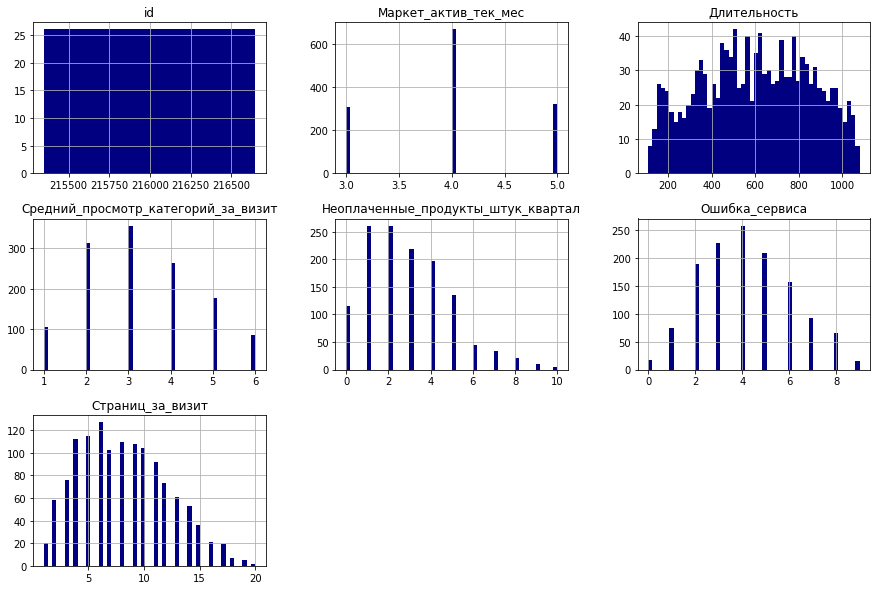

In [18]:
data_info(df_market_file, 15, 10)

#### Выводы раздела

**Наименования столбцов:** 
- Наименования столбцов некорректны, требуется заменить наименования.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**
и
0.   id                                 - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
1.   Покупательская активность          - `object`:тип данных соответствует. 
2.   Тип сервиса                        - `object`:тип данных соответствует. 
3.   Разрешить сообщать                 - `object`:тип данных соответствует. 
4.   Маркет_актив_6_мес                 - `object`:**тип данных не соответствует**. **Требуется дополнительное исследование.**
5.   Маркет_актив_тек_мес               - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
6.   Длительность                       - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
7.   Акционные_покупки                  - `object`:**тип данных не соответствует**. **Требуется дополнительное исследование.**
8.   Популярная_категория               - `object`:тип данных соответствует. Аномальных значений не обнаружено.
9.   Средний_просмотр_категорий_за_визит- `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
10.  Неоплаченные_продукты_штук_квартал - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
11.  Ошибка_сервиса                     - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
12.  Страниц_за_визит                   - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Описание данных market_money.csv


Общая информация о датафрейме .head()



,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id         0
Период     0
Выручка    0
dtype: int64

Соотношение пропусков в датафрейме, %
 id         0.0
Период     0.0
Выручка    0.0
dtype: float64


,id
count,3900.000000
mean,215997.500000
std,375.325686
min,215348.000000
25%,215672.750000
50%,215997.500000
75%,216322.250000
max,216647.000000



Общая информация о датафрейме .hist()



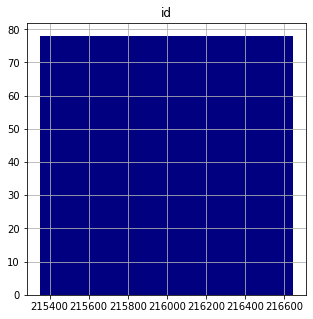

In [19]:
data_info(df_market_money, 5, 5)

#### Выводы раздела

**Наименования столбцов:** 
- Наименования столбцов привести к нижнему регистру.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0.   id     -`int64 `:тип данных соответствует. Аномальных значений не обнаружено.
1.   Период -`object`:тип данных соответствует. 
2.   Выручка-`object`:**тип данных не соответствует**. **Требуется дополнительное исследование.**

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Описание данных market_time.csv


Общая информация о датафрейме .head()



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id        0
Период    0
минут     0
dtype: int64

Соотношение пропусков в датафрейме, %
 id        0.0
Период    0.0
минут     0.0
dtype: float64


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000



Общая информация о датафрейме .hist()



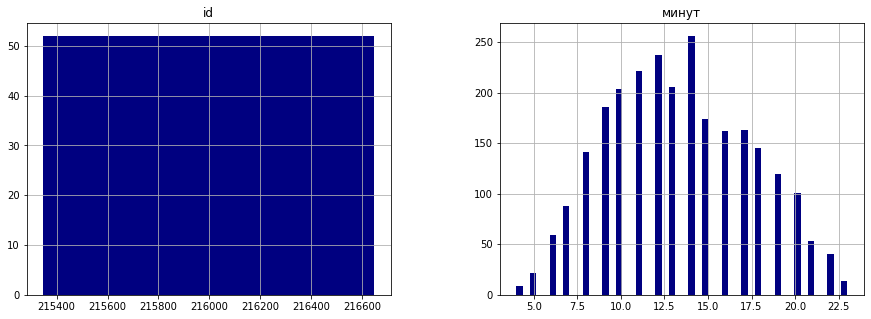

In [20]:
data_info(df_market_time, 15, 5)

#### Выводы раздела

**Наименования столбцов:** 
- Наименования столбцов привести к нижнему регистру.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0. id    - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
1. Период- `object`:тип данных соответствует. 
2. минут - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Описание данных money.csv


Общая информация о датафрейме .head()



,id,Прибыль
0,215348,0.980000
1,215349,4.160000
2,215350,3.130000
3,215351,4.870000
4,215352,4.210000
5,215353,3.950000
6,215354,3.620000
7,215355,5.260000
8,215356,4.930000
9,215357,4.660000



Общая информация о датафрейме .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None


Общая информация о датафрейме .describe()


Количество пропусков в датафрейме
 id         0
Прибыль    0
dtype: int64

Соотношение пропусков в датафрейме, %
 id         0.0
Прибыль    0.0
dtype: float64


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000



Общая информация о датафрейме .hist()



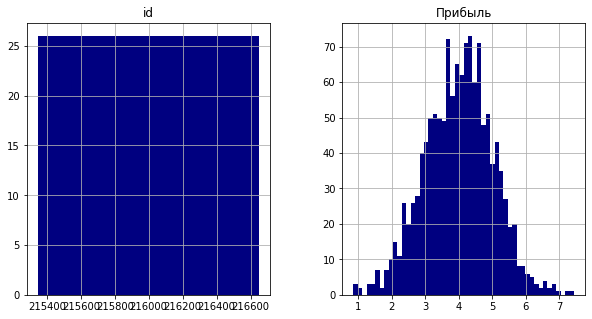

In [21]:
data_info(df_money, 10, 5)

#### Выводы раздела

**Наименования столбцов:** 
- Наименования столбцов привести к нижнему регистру.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0.   id     `int64  `: тип данных соответствует. Аномальных значений не обнаружено.
1.   Прибыль`float64`: тип данных соответствует. Значения сильно отличаются от выручки, необходимо дополнительное исследование.

### Выводы главы

В результате предварительного ознакомления с данными были выявлены следующие недостатки:

**df_market_file:**
**Наименования столбцов:** 
- Наименования столбцов некорректны, требуется заменить наименования.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0.   id                                 - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
1.   Покупательская активность          - `object`:тип данных соответствует. 
2.   Тип сервиса                        - `object`:тип данных соответствует. 
3.   Разрешить сообщать                 - `object`:тип данных соответствует. 
4.   Маркет_актив_6_мес                 - `object`:**тип данных не соответствует**. **Требуется дополнительное исследование.**
5.   Маркет_актив_тек_мес               - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
6.   Длительность                       - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
7.   Акционные_покупки                  - `object`:**тип данных не соответствует**. **Требуется дополнительное исследование.**
8.   Популярная_категория               - `object`:тип данных соответствует. Аномальных значений не обнаружено.
9.   Средний_просмотр_категорий_за_визит- `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
10.  Неоплаченные_продукты_штук_квартал - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
11.  Ошибка_сервиса                     - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
12.  Страниц_за_визит                   - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.


**df_market_money:**
**Наименования столбцов:** 
- Наименования столбцов привести к нижнему регистру.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0.   id     -`int64 `:тип данных соответствует. Аномальных значений не обнаружено.
1.   Период -`object`:тип данных соответствует. 
2.   Выручка-`object`:**тип данных не соответствует**. **Требуется дополнительное исследование.**

**df_market_time:**
**Наименования столбцов:** 
- Наименования столбцов привести к нижнему регистру.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0. id    - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.
1. Период- `object`:тип данных соответствует. 
2. минут - `int64 `:тип данных соответствует. Аномальных значений не обнаружено.

**df_money:**

**Наименования столбцов:** 
- Наименования столбцов привести к нижнему регистру.

**Пропуски данных:** 
- Пропусков не обнаружено.

**Тип данных и аномальные значения:**

0.   id     `int64  `: тип данных соответствует. Аномальных значений не обнаружено.
1.   Прибыль`float64`: тип данных соответствует. Значения сильно отличаются от выручки, необходимо дополнительное исследование.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Предобработка данных

[К оглавлению](#Оглавление)

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Замена наименований столбцов

[К оглавлению](#Оглавление)

#### market_file.csv

Изменим наименования столбцов

In [22]:
df_market_file = df_market_file.rename(columns={'Покупательская активность': 'Покупательская_активность',
                                                'Тип сервиса': 'Тип_сервиса',
                                                'Разрешить сообщать': 'Разрешить_сообщать'})

Приведем наименования столбцов к нижнему регистру

In [23]:
df_market_file = df_market_file.rename(columns=lambda x: x.lower()) 

In [24]:
df_market_file.columns.to_list()

['id',
 'покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'популярная_категория',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит']

#### market_money.csv

Приведем наименования столбцов к нижнему регистру

In [25]:
df_market_money = df_market_money.rename(columns=lambda x: x.lower()) 

In [26]:
df_market_money.columns.to_list()

['id', 'период', 'выручка']

#### market_time.csv

In [27]:
df_market_time = df_market_time.rename(columns=lambda x: x.lower()) 

In [28]:
df_market_time.columns.to_list()

['id', 'период', 'минут']

#### money.csv

In [29]:
df_money = df_money.rename(columns=lambda x: x.lower()) 

In [30]:
df_money.columns.to_list()

['id', 'прибыль']

#### Выводы раздела

В рамках работы в данном разделе была выполнена **замена наименований столбцов**:
1. market_file.csv
    - Покупательская активность => Покупательская_активность
    - Тип сервиса => Тип_сервиса
    - Разрешить сообщать => Разрешить_сообщать
    - Все столбцы приведены к нижнему регистру
2. market_money.csv
    - Все столбцы приведены к нижнему регистру
3. market_time.csv
    - Все столбцы приведены к нижнему регистру
4. money.csv
    - Все столбцы приведены к нижнему регистру

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка пропущенных значений

[К оглавлению](#Оглавление)

In [31]:
df_market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [32]:
df_market_money.isna().sum() 

id         0
период     0
выручка    0
dtype: int64

In [33]:
df_market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [34]:
df_money.isna().sum()

id         0
прибыль    0
dtype: int64

#### Выводы раздела

**Обработка пропущенных значений**:
- Пропущенных значений не обнаружено

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Преобразование типов данных

[К оглавлению](#Оглавление)

Преобразуем типы данных в соответствии с выводами главы 1

#### market_file.csv

In [35]:
#типы данных до преобразования
df_market_file.dtypes

id                                      int64
покупательская_активность              object
тип_сервиса                            object
разрешить_сообщать                     object
маркет_актив_6_мес                     object
маркет_актив_тек_мес                    int64
длительность                            int64
акционные_покупки                      object
популярная_категория                   object
средний_просмотр_категорий_за_визит     int64
неоплаченные_продукты_штук_квартал      int64
ошибка_сервиса                          int64
страниц_за_визит                        int64
dtype: object

In [36]:
df_market_file = df_market_file.apply(pd.to_numeric, errors='ignore')

In [37]:
#типы данных после преобразования
df_market_file.dtypes

id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object

#### market_money.csv

In [38]:
#типы данных до преобразования
df_market_money.dtypes

id          int64
период     object
выручка    object
dtype: object

In [39]:
df_market_money = df_market_money.apply(pd.to_numeric, errors='ignore')

In [40]:
#типы данных после преобразования
df_market_money.dtypes

id           int64
период      object
выручка    float64
dtype: object

#### market_time.csv

In [41]:
#типы данных до преобразования
df_market_time.dtypes

id         int64
период    object
минут      int64
dtype: object

Преобразование типов данных не требуется

#### money.csv

In [42]:
#типы данных до преобразования
df_money.dtypes

id           int64
прибыль    float64
dtype: object

Преобразование типов данных не требуется

#### Выводы раздела

**Преобразование типов данных**

**market_file.csv**

- маркет_актив_6_мес: object => float64
- акционные_покупки:  object => float64

**market_money.csv** 
- выручка:   object => float64

**market_time.csv**
- преобразование типов данных не требуется

**money.csv**
- преобразование типов данных не требуется

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка явных дубликатов

[К оглавлению](#Оглавление)

#### market_file.csv

In [43]:
print('\nКоличество дубликатов в датафрейме\n', df_market_file.duplicated().sum())


Количество дубликатов в датафрейме
 0


#### market_money.csv 

In [44]:
print('\nКоличество дубликатов в датафрейме\n', df_market_money.duplicated().sum())


Количество дубликатов в датафрейме
 0


#### market_time.csv

In [45]:
print('\nКоличество дубликатов в датафрейме\n', df_market_time.duplicated().sum())


Количество дубликатов в датафрейме
 0


#### money.csv

In [46]:
print('\nКоличество дубликатов в датафрейме\n', df_money.duplicated().sum())


Количество дубликатов в датафрейме
 0


#### Выводы раздела

**Обработка явных дубликатов**:
- Явных дубликатов не обнаружено

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка неявных дубликатов

[К оглавлению](#Оглавление)

#### market_file.csv

Приведём все строковые значения к нижнему регистру

In [47]:
for col in df_market_file.select_dtypes(include='object'):
    df_market_file[col]  = df_market_file[col].str.lower()

Были обнаружены дубликаты в столбцах:

- `тип_сервиса`

Исправим значения в этих столбцах

In [48]:
df_market_file.replace({'стандартт': 'стандарт'},inplace=True)

In [49]:
for col in df_market_file.select_dtypes(include='object'):
    print('\nНаименование столбца: ',col)
    print(df_market_file[col].unique())


Наименование столбца:  покупательская_активность
['снизилась' 'прежний уровень']

Наименование столбца:  тип_сервиса
['премиум' 'стандарт']

Наименование столбца:  разрешить_сообщать
['да' 'нет']

Наименование столбца:  популярная_категория
['товары для детей' 'домашний текстиль' 'косметика и аксесуары'
 'техника для красоты и здоровья' 'кухонная посуда'
 'мелкая бытовая техника и электроника']


#### market_money.csv 

In [50]:
for col in df_market_money.select_dtypes(include='object'):
    print('\nНаименование столбца: ',col)
    print(df_market_money[col].unique())


Наименование столбца:  период
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Дубликатов не обнаружено

#### market_time.csv

In [51]:
for col in df_market_time.select_dtypes(include='object'):
    print('\nНаименование столбца: ',col)
    print(df_market_time[col].unique())


Наименование столбца:  период
['текущий_месяц' 'предыдцщий_месяц']


Были обнаружены опечатки в столбцах:

- `период`

Исправим значения в этих столбцах

In [52]:
df_market_time.replace({'предыдцщий_месяц': 'предыдущий_месяц'},inplace=True)

In [53]:
for col in df_market_time.select_dtypes(include='object'):
    print('\nНаименование столбца: ',col)
    print(df_market_time[col].unique())


Наименование столбца:  период
['текущий_месяц' 'предыдущий_месяц']


#### money.csv

In [54]:
df_money.dtypes

id           int64
прибыль    float64
dtype: object

Строковые данные отсутствуют

#### Выводы раздела

**Обработка неявных дубликатов:**

**market_file.csv**
Были обнаружены и исправлены дубликаты в столбцах:

- `тип_сервиса`:`стандартт` => `стандарт`

**market_money.csv**

- дубликатов не обнаружено

**market_time.csv**

Были обнаружены и исправлены опечатки в столбцах:

- `период`: `предыдцщий_месяц` => `предыдущий_месяц`

**money.csv**

- Строковые данные отсутствуют

<span style='color:red'>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

### Обработка аномальных значений

[К оглавлению](#Оглавление)

**Обработка аномальных значений:**

Предварительно аномальных значений не обнаружено, дальнейшее выявление будет происходить на этапе исследовательского анализа

### Выводы главы

В результате предобработки данных были выявлены и устранены следующие недостатки:

**Замена наименований столбцов**:
1. market_file.csv
    - Покупательская активность => Покупательская_активность
    - Тип сервиса => Тип_сервиса
    - Разрешить сообщать => Разрешить_сообщать
    - Все столбцы приведены к нижнему регистру
2. market_money.csv
    - Все столбцы приведены к нижнему регистру
3. market_time.csv
    - Все столбцы приведены к нижнему регистру
4. money.csv
    - Все столбцы приведены к нижнему регистру
   
   
   
**Обработка пропущенных значений**:
- Пропущенных значений не обнаружено



**Преобразование типов данных**

**market_file.csv**

- маркет_актив_6_мес: object => float64
- акционные_покупки:  object => float64

**market_money.csv** 
- выручка:   object => float64

**market_time.csv**
- преобразование типов данных не требуется

**money.csv**
- преобразование типов данных не требуется



**Обработка неявных дубликатов:**

**market_file.csv**
Были обнаружены и исправлены дубликаты в столбцах:

- `тип_сервиса`:`стандартт` => `стандарт`

**market_money.csv**

- дубликатов не обнаружено

**market_time.csv**

Были обнаружены и исправлены опечатки в столбцах:

- `период`: `предыдцщий_месяц` => `предыдущий_месяц`

**money.csv**

- Строковые данные отсутствуют

Проверим размерности датасетов

In [55]:
print('\nРазмерность df_market_file\n', df_market_file.shape)
print('\nРазмерность df_market_money\n', df_market_money.shape)
print('\nРазмерность df_market_time\n', df_market_time.shape)
print('\nРазмерность df_money\n', df_money.shape)


Размерность df_market_file
 (1300, 13)

Размерность df_market_money
 (3900, 3)

Размерность df_market_time
 (2600, 3)

Размерность df_money
 (1300, 2)


Как видно, размерности столбцов не совпадают, но заказчик предоставил комментарии по данному вопросу: "Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода."

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Исследовательский анализ данных

[К оглавлению](#Оглавление)

### market_file.csv

Не обнаружено столбцов для исключения


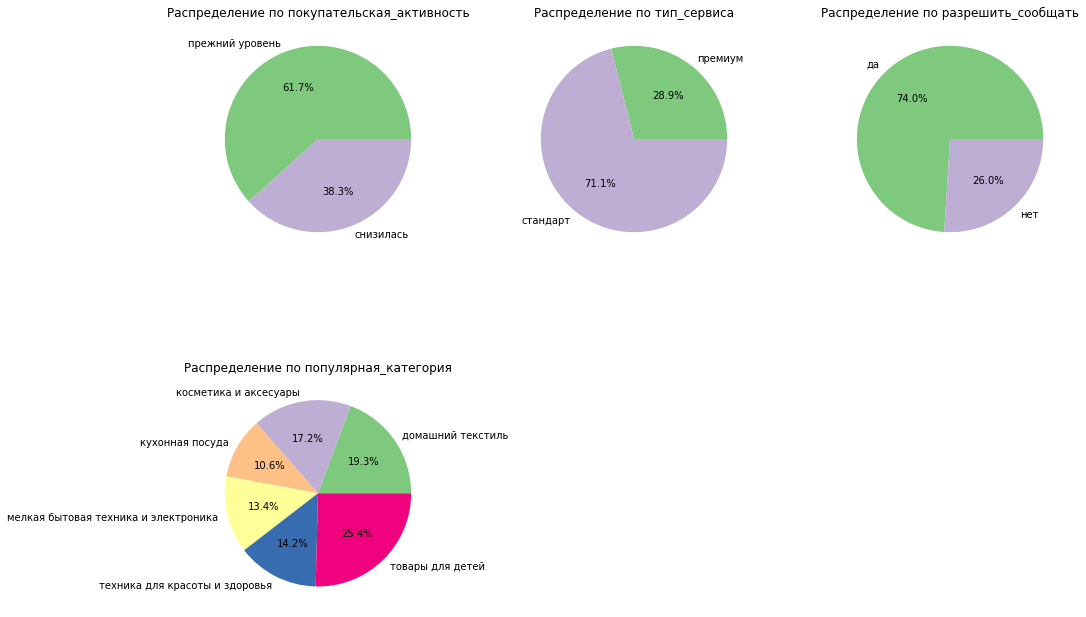

In [56]:
data_category_analyze(df_market_file, ' ', market_file_x_labels)


Исследование числовых значений


Общая информация о данных (describe)



,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.270000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.355350,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


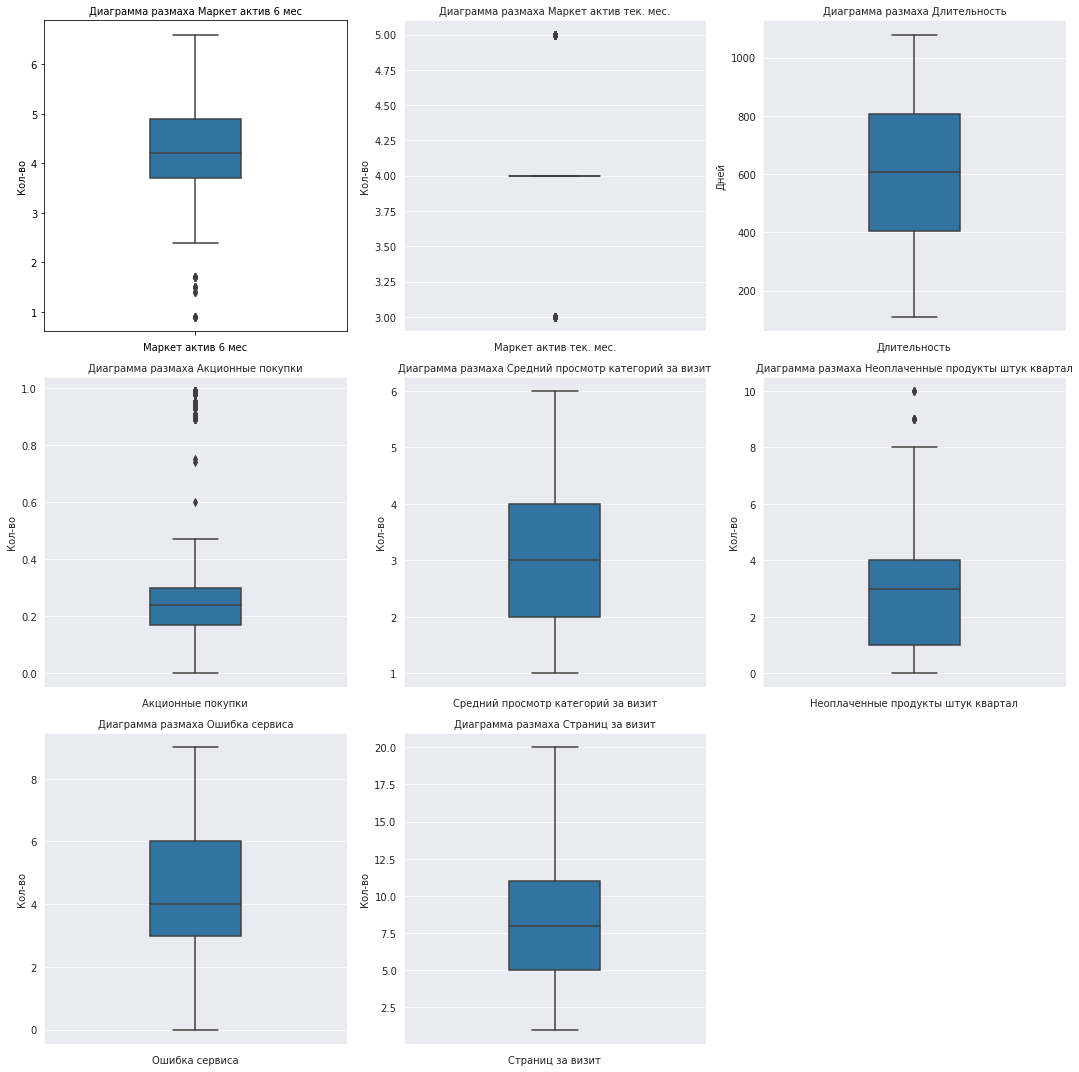

In [57]:
data_numbers_analyze(df_market_file, ['id'], market_file_x_labels, market_file_y_labels, 15, 15)

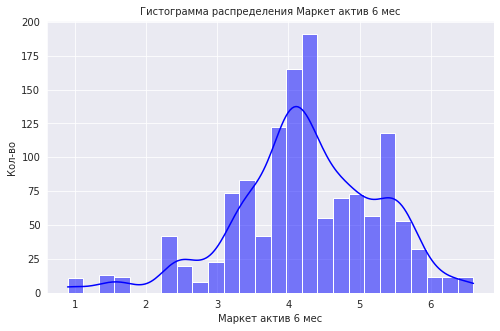

stat=0.978, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


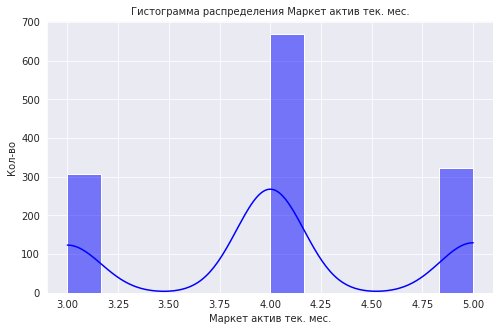

stat=0.806, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


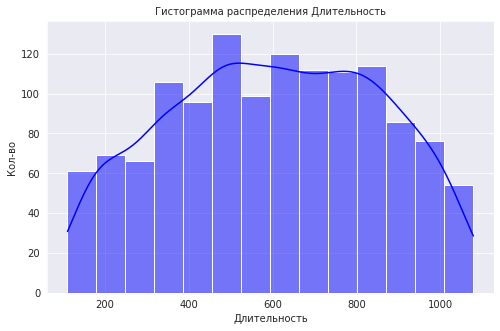

stat=0.973, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


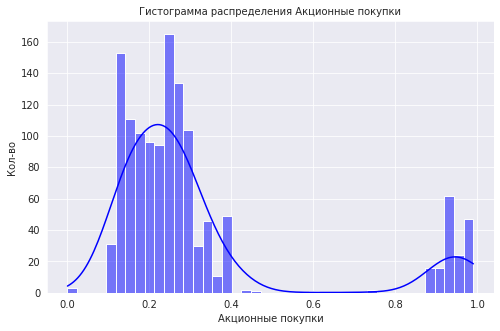

stat=0.662, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


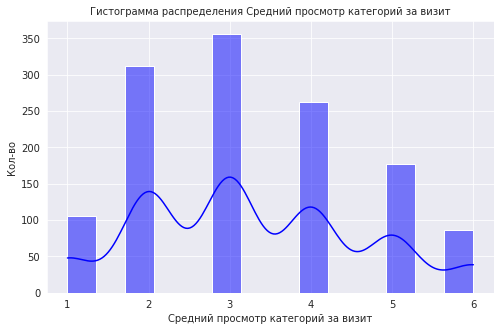

stat=0.931, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


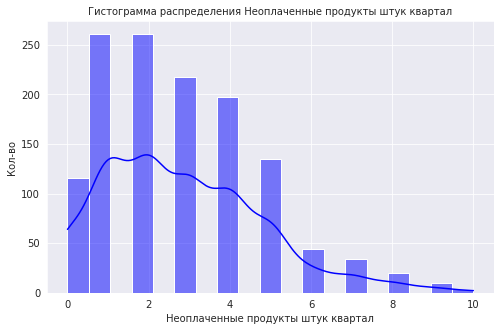

stat=0.933, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


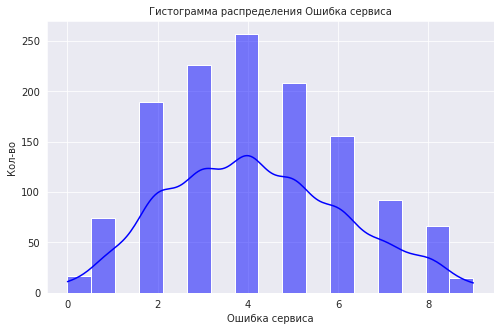

stat=0.966, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


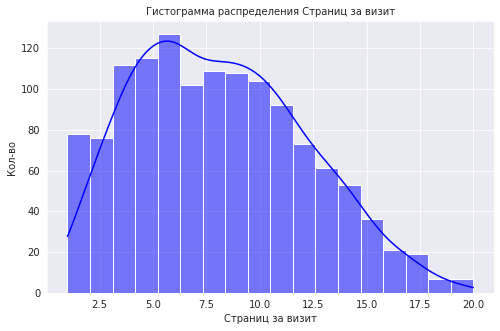

stat=0.974, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


In [58]:
data_hist_analyze(df_market_file, ['id'], market_file_x_labels, market_file_y_labels)

#### Выводы раздела

**market_file.csv**

Как видно из круговых диаграмм, покупательская активность, в основном, остаётся на прежнем уровне.
Тем не менее, процент пользователей, покупательская активность которых снизилась составляет 38,3%.
В основном, пользователи пользуются типом подписки `стандарт`. Большинство пользователей дали согласие на 
предоставление специальных предложений. Наиболее популярными категориями товаров являются товары для детей,
домашний текстиль, косметика и аксессуары. 
Анализ гистограмм размаха показал, что в данных присутствуют выбивающиеся значения (выбросы), но , 
в целом, они лежат в пределах нормы, исключение каких-либо данных не требуется.

Значения ни одного из признаков не имеют нормального распределения.

### market_money.csv 

Не обнаружено столбцов для исключения


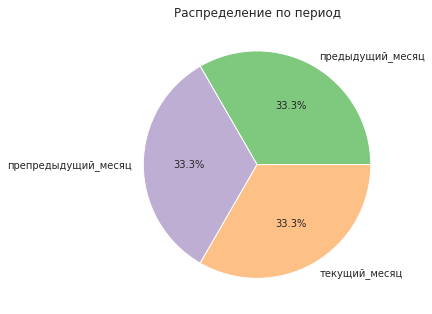

In [59]:
data_category_analyze(df_market_money, ' ',  market_money_x_labels)


Исследование числовых значений


Общая информация о данных (describe)



,выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


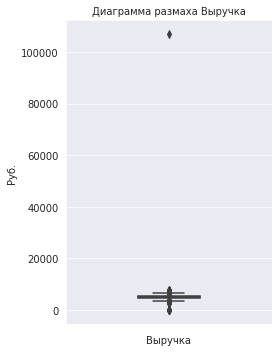

In [60]:
data_numbers_analyze(df_market_money, ['id'], market_money_x_labels, market_money_y_labels, 10, 5)

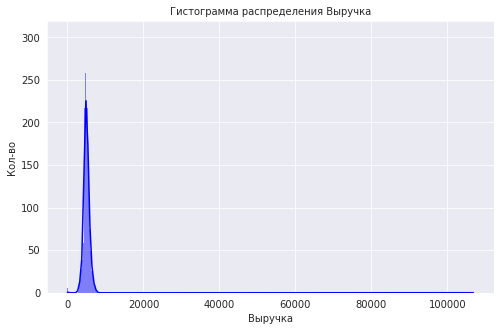

stat=0.198, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


In [61]:
data_hist_analyze(df_market_money, ['id'], market_money_x_labels, market_money_y_labels)

Как видно, имеется явно выбивающееся (аномальное) значение выручки, изучим подробнее

In [62]:
df_market_money.query('выручка > 20000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Проверим, совершал ли пользователь с данным id другие покупки

In [63]:
df_market_money.query('id == 215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


Возможно, пользователь действительно совершил такую покупку, но других пользователей с такими покупками нет. Поэтому лучше заменить такое значение на медианное по покупкам данного пользователя, иначе, это навредит модели.

In [64]:
df_market_money['выручка'].replace({106862.2: df_market_money.query('id == 215380')['выручка'].median()}, inplace=True)

In [65]:
df_market_money.query('id == 215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,6077.0


Заново построим графики


Исследование числовых значений


Общая информация о данных (describe)



,выручка
count,3900.000000
mean,4999.853692
std,707.119709
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,7799.400000


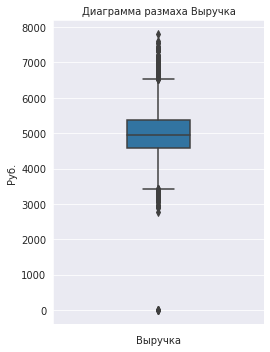

In [66]:
data_numbers_analyze(df_market_money, ['id'], market_money_x_labels, market_money_y_labels, 10, 5)

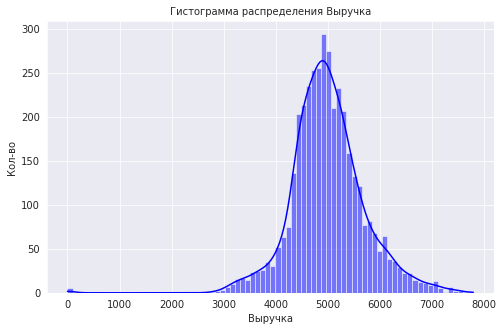

stat=0.959, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


In [67]:
data_hist_analyze(df_market_money, ['id'], market_money_x_labels, market_money_y_labels)

#### Выводы раздела

**market_money.csv**

Как видно из круговой диаграммы, распределение пользователей по периодам, за который зафикирована выручка, одинаковое
При анализе числовых данных было обнаружено аномальное значение, заменено на медианное.
В данных также присутствуют нулевые значения, которые будут обработаны определенным образом на дальнейшем этапе (отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.)
Распределение по столбцу `выручка` не нормальное.

### market_time.csv

Не обнаружено столбцов для исключения


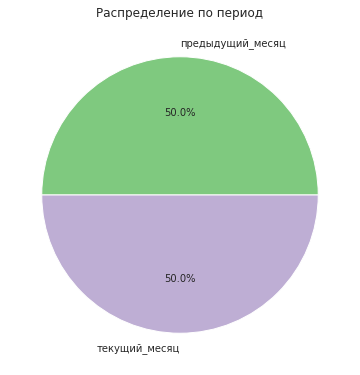

In [68]:
data_category_analyze(df_market_time, ' ',  market_time_x_labels)


Исследование числовых значений


Общая информация о данных (describe)



,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


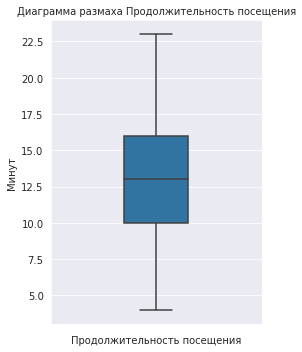

In [69]:
data_numbers_analyze(df_market_time, ['id'], market_time_x_labels, market_time_y_labels, 10, 5)

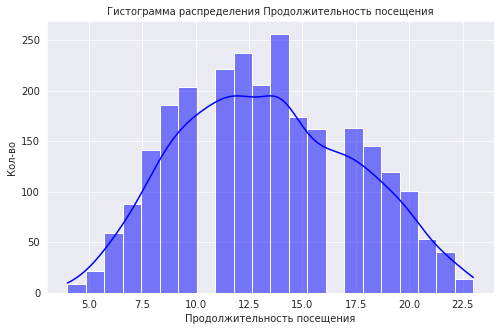

stat=0.983, p=0.000

Вероятно, распределение не нормальное (не Гауссово)


In [70]:
data_hist_analyze(df_market_time, ['id'], market_time_x_labels, market_time_y_labels)

#### Выводы раздела

**market_time.csv**

Круговая диаграмма показывает, что количество пользователей одинаково распределено по месяцам.
Выбросов в данных не имеется, распределение по столбцу `продолжительность_посещения` не нормальное.

### money.csv


Исследование числовых значений


Общая информация о данных (describe)



,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


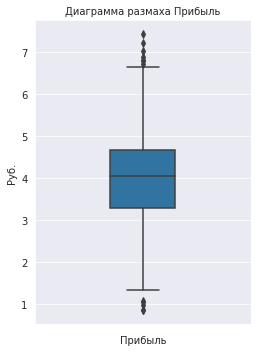

In [71]:
data_numbers_analyze(df_money, ['id'], money_x_labels, money_y_labels, 10, 5)

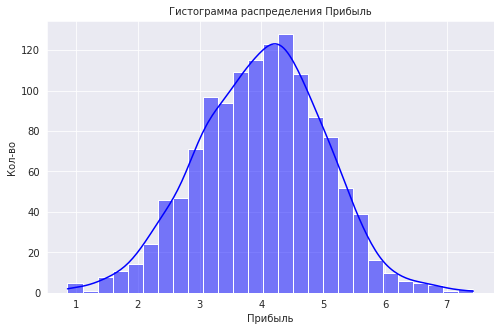

stat=0.998, p=0.258

Вероятно, распределение нормальное (Гауссово)


In [72]:
data_hist_analyze(df_money, ['id'], money_x_labels, money_y_labels)

#### Выводы раздела

**money.csv**

Категориальные данные отсутствуют, анализ числовых данных показал отсутствие аномальных значений, распределение близко к нормальному

### Фильтрация клиентов с покупательской активностью не менее трёх месяцев

Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

Таким образом, необходимо исключить из данных клиентов, выручка которых хотя бы в одном из периодов (текущий_месяц, предыдущий_месяц, препредыдущий_месяц) была нулевой. Выявим таковых.

In [73]:
df_market_money.query('выручка == 0')['id'].drop_duplicates().to_list()

[215348, 215357, 215359]

In [74]:
df_market_money.query('(id == 215348) or (id == 215357) or (id == 215359)')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
27,215357,текущий_месяц,5986.3
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
33,215359,текущий_месяц,4735.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [75]:
df_three_month_market_file = df_market_file.copy()

In [76]:
df_three_month_market_money = df_market_money.copy()

In [77]:
df_three_month_market_time = df_market_time.copy()

In [78]:
df_three_month_money = df_money.copy()

In [79]:
df_three_month_market_file.drop(index=df_three_month_market_file.query('(id == 215348) or \
                                                                          (id == 215357) or \
                                                                          (id == 215359)').index.to_list(), inplace=True)

In [80]:
df_three_month_market_money.drop(index=df_three_month_market_money.query('(id == 215348) or \
                                                                          (id == 215357) or \
                                                                          (id == 215359)').index.to_list(), inplace=True)

In [81]:
df_three_month_market_time.drop(index=df_three_month_market_time.query('(id == 215348) or \
                                                                          (id == 215357) or \
                                                                          (id == 215359)').index.to_list(), inplace=True)

In [82]:
df_three_month_money.drop(index=df_three_month_money.query('(id == 215348) or \
                                                            (id == 215357) or \
                                                            (id == 215359)').index.to_list(), inplace=True)

In [83]:
print('Размерность df_market_file:', df_market_file.shape)
print('Размерность df_three_month_market_file:', df_three_month_market_file.shape)

Размерность df_market_file: (1300, 13)
Размерность df_three_month_market_file: (1297, 13)


In [84]:
print('Размерность df_market_money:', df_market_money.shape)
print('Размерность df_three_month_market_money:', df_three_month_market_money.shape)

Размерность df_market_money: (3900, 3)
Размерность df_three_month_market_money: (3891, 3)


In [85]:
print('Размерность df_market_time:', df_market_time.shape)
print('Размерность df_three_month_market_time:', df_three_month_market_time.shape)

Размерность df_market_time: (2600, 3)
Размерность df_three_month_market_time: (2594, 3)


In [86]:
print('Размерность df_money:', df_money.shape)
print('Размерность df_three_month_market_time:', df_three_month_money.shape)

Размерность df_money: (1300, 2)
Размерность df_three_month_market_time: (1297, 2)


### Выводы главы

Был выполнен исследовательский анализ данных, результаты которого представлены ниже:

**market_file.csv**

Как видно из круговых диаграмм, покупательская активность, в основном, остаётся на прежнем уровне.
Тем не менее, процент пользователей, покупательская активность которых снизилась составляет 38,3%.
В основном, пользователи пользуются типом подписки `стандарт`. Большинство пользователей дали согласие на 
предоставление специальных предложений. Наиболее популярными категориями товаров являются товары для детей,
домашний текстиль, косметика и аксессуары. 
Анализ гистограмм размаха показал, что в данных присутствуют выбивающиеся значения (выбросы), но , 
в целом, они лежат в пределах нормы, исключение каких-либо данных не требуется.

Значения ни одного из признаков не имеют нормального распределения.

**market_money.csv**

Как видно из круговой диаграммы, распределение пользователей по периодам, за который зафикирована выручка, одинаковое
При анализе числовых данных было обнаружено аномальное значение, заменено на медианное. Распределение по столбцу `выручка` не нормальное.

**market_time.csv**

Круговая диаграмма показывает, что количество пользователей одинаково распределено по месяцам.
Выбросов в данных не имеется, распределение по столбцу `продолжительность_посещения` не нормальное.

**money.csv**

Категориальные данные отсутствуют, анализ числовых данных показал отсутствие аномальных значений, распределение по столбцу `прибыль` близко к нормальному

**Также** были выявлены покупатели с ненулевой покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Объединение таблиц

[К оглавлению](#Оглавление)

Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 

Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

Преобразуем датафрейм df_three_month_market_money

In [87]:
for col_name in df_three_month_market_money['период'].drop_duplicates().to_list():
    df_three_month_market_money.insert(loc=len(df_three_month_market_money.columns), 
                                       column=col_name, 
                                       value=df_three_month_market_money.query('период == @col_name')['выручка'])

In [88]:
df_three_month_market_money.drop(columns=['период','выручка'], inplace=True)

In [89]:
df_three_month_market_money = df_three_month_market_money.pivot_table(
    index='id',values=['препредыдущий_месяц','текущий_месяц','предыдущий_месяц']
)

In [90]:
df_three_month_market_money = df_three_month_market_money.reset_index()

Переименуем столбцы

In [91]:
df_three_month_market_money = df_three_month_market_money.rename(columns={"id": "id", 
                                                                          "предыдущий_месяц": "выручка_предыдущий_месяц",
                                                                          "препредыдущий_месяц": "выручка_препредыдущий_месяц",
                                                                          "текущий_месяц": "выручка_текущий_месяц"})

In [92]:
nice_t(df_three_month_market_money.head())

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.000000,4472.000000,4971.600000
1,215350,5457.500000,4826.000000,5058.400000
2,215351,6158.000000,4793.000000,6610.400000
3,215352,5807.500000,4594.000000,5872.500000
4,215353,4738.500000,5124.000000,5388.500000


Преобразуем датафрейм df_three_month_market_time

In [93]:
for col_name in df_three_month_market_time['период'].drop_duplicates().to_list():
    df_three_month_market_time.insert(loc=len(df_three_month_market_time.columns), 
                                       column=col_name, 
                                       value=df_three_month_market_time.query('период == @col_name')['минут'])

In [94]:
df_three_month_market_time.drop(columns=['период','минут'], inplace=True)

In [95]:
df_three_month_market_time = df_three_month_market_time.pivot_table(
    index='id',values=['текущий_месяц','предыдущий_месяц']
)

In [96]:
df_three_month_market_time = df_three_month_market_time.reset_index()

In [97]:
df_three_month_market_time = df_three_month_market_time.rename(columns={"id": "id", 
                                                                          "предыдущий_месяц": "минут_предыдущий_месяц",
                                                                          "текущий_месяц": "минут_текущий_месяц"})

In [98]:
nice_t(df_three_month_market_time.head())

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,12.000000,10.000000
1,215350,8.000000,13.000000
2,215351,11.000000,13.000000
3,215352,8.000000,11.000000
4,215353,10.000000,10.000000


Проверим размерности перед объединением

In [99]:
print('Размерность df_three_month_market_file:', df_three_month_market_file.shape)
print('Размерность df_three_month_market_money:', df_three_month_market_money.shape)
print('Размерность df_three_month_market_time:', df_three_month_market_time.shape)
print('Размерность df_three_month_market_time:', df_three_month_money.shape)

Размерность df_three_month_market_file: (1297, 13)
Размерность df_three_month_market_money: (1297, 4)
Размерность df_three_month_market_time: (1297, 3)
Размерность df_three_month_market_time: (1297, 2)


Объеденим таблицы

In [100]:
df_customers_stat_merged = df_three_month_market_file.merge(df_three_month_market_money, on='id')
df_customers_stat_merged = df_customers_stat_merged.merge(df_three_month_market_time, on='id')

In [101]:
nice_t(df_customers_stat_merged.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.400000,4,819,0.750000,товары для детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12.000000,10.000000
1,215350,снизилась,стандарт,нет,4.900000,3,539,0.140000,домашний текстиль,5,2,1,5,5457.500000,4826.000000,5058.400000,8.000000,13.000000
2,215351,снизилась,стандарт,да,3.200000,5,896,0.990000,товары для детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11.000000,13.000000
3,215352,снизилась,стандарт,нет,5.100000,3,1064,0.940000,товары для детей,3,2,3,2,5807.500000,4594.000000,5872.500000,8.000000,11.000000
4,215353,снизилась,стандарт,да,3.300000,4,762,0.260000,домашний текстиль,4,1,1,4,4738.500000,5124.000000,5388.500000,10.000000,10.000000


In [102]:
df_customers_stat_merged.columns.to_list()

['id',
 'покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'популярная_категория',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_предыдущий_месяц',
 'выручка_препредыдущий_месяц',
 'выручка_текущий_месяц',
 'минут_предыдущий_месяц',
 'минут_текущий_месяц']

In [103]:
print('Размерность df_three_month_market_time:', df_customers_stat_merged.shape)

Размерность df_three_month_market_time: (1297, 18)


### Выводы главы

Были преобразованы датафреймы:
- `df_three_month_market_money`
- `df_three_month_market_time`

Данные были разделены на отдельные столбцы с разделением по периодам.

Была создана новая таблица `df_customers_stat_merged` с объединением следущих датафреймов:
- `df_three_month_market_file`
- `df_three_month_market_money`
- `df_three_month_market_time`

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Корреляционный анализ

[К оглавлению](#Оглавление)

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

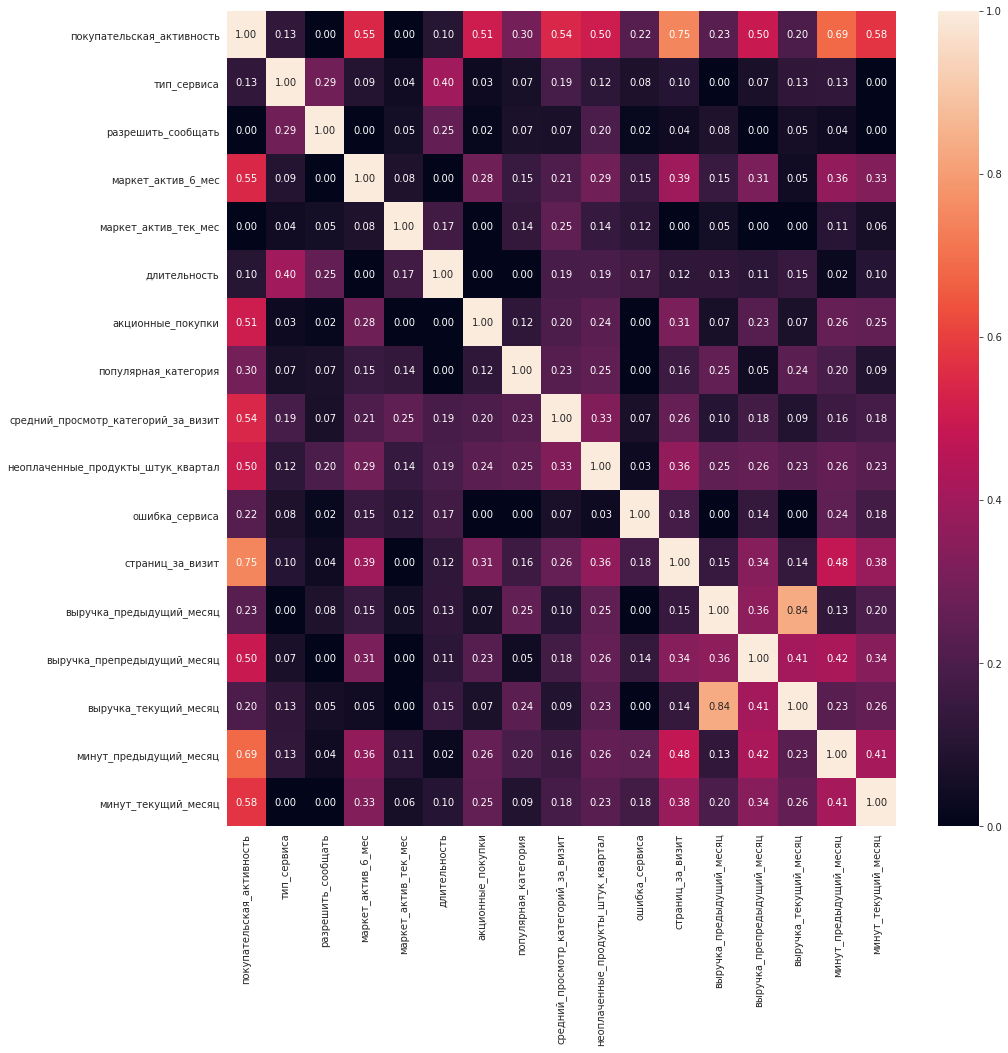

In [104]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_customers_stat_merged 
            .loc[:,'покупательская_активность':'минут_текущий_месяц']
            .phik_matrix(verbose=False), annot=True, fmt='.2f')
plt.show()

Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column


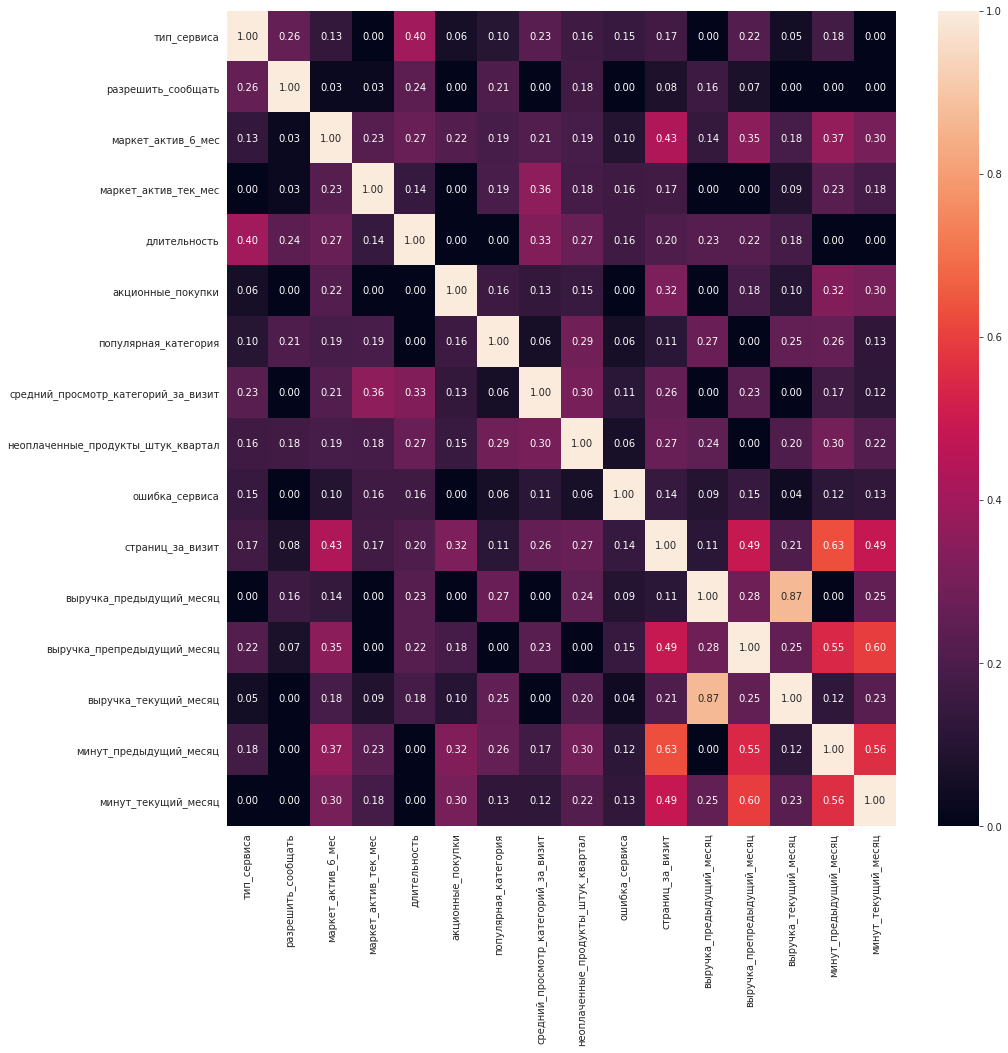

In [105]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_customers_stat_merged
            .query('покупательская_активность == "снизилась"')
            .loc[:,'покупательская_активность':'минут_текущий_месяц']
            .phik_matrix(verbose=False), annot=True, fmt='.2f')
plt.show()

In [106]:
df_customers_stat_merged.query('покупательская_активность == "снизилась"') \
                        .loc[:,'покупательская_активность':'минут_текущий_месяц'] \
                        .shape

(495, 17)

In [107]:
df_customers_stat_merged.query('покупательская_активность == "снизилась"') \
                        .loc[:,'покупательская_активность':'минут_текущий_месяц'] \
                        .head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12.0,10.0
1,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8.0,13.0
2,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11.0,13.0
3,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8.0,11.0
4,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10.0,10.0


### Выводы главы

При корреляционном анализе была выявлена средняя и сильная связь между целевым признаком `покупательская_активность` и:
- `минут_текущий месяц` (0.58)
- `минут_предыдущий_месяц` (0.69)
- `выручка_препредыдущий_месяц` (0.49) 
- `страниц_за_визит` (0.75)
- `неоплаченные_продукты_штук_квартал` (0.50)
- `средний_просмотр_категорий_за_визит` (0.54)
- `акционные_покупки` (0.51)
- `маркет_актив_6_мес` (0.55)

Мультиколлинеарности между признаками не обнаружено.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Использование пайплайнов

[К оглавлению](#Оглавление)

Примените все изученные модели. Для этого используйте пайплайны.

1. Во время подготовки данных используйте `ColumnTransformer`. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных - как минимум два скейлера.

Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

2. Обучите четыре модели: `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()` и `SVC()`. Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

3. Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:

-   использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
-   использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

Выведем информацию для подбора признаков

In [108]:
df_customers_stat_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [109]:
nice_t(df_customers_stat_merged.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.400000,4,819,0.750000,товары для детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12.000000,10.000000
1,215350,снизилась,стандарт,нет,4.900000,3,539,0.140000,домашний текстиль,5,2,1,5,5457.500000,4826.000000,5058.400000,8.000000,13.000000
2,215351,снизилась,стандарт,да,3.200000,5,896,0.990000,товары для детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11.000000,13.000000
3,215352,снизилась,стандарт,нет,5.100000,3,1064,0.940000,товары для детей,3,2,3,2,5807.500000,4594.000000,5872.500000,8.000000,11.000000
4,215353,снизилась,стандарт,да,3.300000,4,762,0.260000,домашний текстиль,4,1,1,4,4738.500000,5124.000000,5388.500000,10.000000,10.000000


In [110]:
df_customers_stat_merged['маркет_актив_тек_мес'].unique()

array([4, 3, 5])

In [111]:
df_customers_stat_merged['средний_просмотр_категорий_за_визит'].unique()

array([4, 5, 3, 2, 6, 1])

In [112]:
df_customers_stat_merged['неоплаченные_продукты_штук_квартал'].unique()

array([ 4,  2,  0,  1,  3,  5,  8,  6,  9, 10,  7])

In [113]:
df_customers_stat_merged['ошибка_сервиса'].unique()

array([2, 1, 6, 3, 7, 4, 5, 8, 9, 0])

In [114]:
df_customers_stat_merged['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    df_customers_stat_merged.drop(['покупательская_активность', 'id'], axis=1),
    df_customers_stat_merged['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_customers_stat_merged['покупательская_активность'])

In [116]:
print('Размерность df_customers_stat_merged', df_customers_stat_merged.shape)
print('Размерность X_train:', X_train.shape, 'Отношение к общему:', round(len(X_train)/len(df_customers_stat_merged)*100,1))
print('Размерность X_test:', X_test.shape, 'Отношение к общему:', round(len(X_test)/len(df_customers_stat_merged)*100,1))
print('Размерность y_train:', y_train.shape, 'Отношение к общему:', round(len(y_train)/len(df_customers_stat_merged)*100,1))
print('Размерность y_test:', y_test.shape, 'Отношение к общему:', round(len(y_test)/len(df_customers_stat_merged)*100,1))

Размерность df_customers_stat_merged (1297, 18)
Размерность X_train: (972, 16) Отношение к общему: 74.9
Размерность X_test: (325, 16) Отношение к общему: 25.1
Размерность y_train: (972,) Отношение к общему: 74.9
Размерность y_test: (325,) Отношение к общему: 25.1


In [117]:

 
#создадим списки количественных, категориальных, ранговых признаков
 
ohe_columns = ['разрешить_сообщать', 'популярная_категория'] 
num_col = ['маркет_актив_6_мес', 
           'длительность', 
           'акционные_покупки',
           'страниц_за_визит', 
           'выручка_препредыдущий_месяц', 
           'выручка_предыдущий_месяц',
           'выручка_текущий_месяц',
           'минут_предыдущий_месяц', 
           'минут_текущий_месяц'] 
ord_col = ['тип_сервиса',
           'маркет_актив_тек_мес',
           'средний_просмотр_категорий_за_визит',
           'неоплаченные_продукты_штук_квартал', 
           'ошибка_сервиса', ]
 
# Pipeline для кодирования категориальных признаков
ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)
 
ord_pipe = Pipeline(
    [
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    [3, 4, 5],
                    [1, 2, 3, 4, 5, 6],
                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
    ]
)
 
# Pipeline для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_col),
        ('num', MinMaxScaler(), num_col)
    ], 
    remainder='passthrough'
)
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
 
param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'], 
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               SVC(random_state=RANDOM_STATE),
               LogisticRegression(random_state=RANDOM_STATE, max_iter=6000)]
}
 
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('ord',
                                                                                                OrdinalEncoder(categories=[['стандарт',
                                                                                                                            'премиу...
                                                                                'минут_текущий_месяц'])])),
                                             ('models',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'models': [DecisionTreeClassifier(random_state=42),
                                                   KNeighborsClassifier(),
                                                   SVC(random_state=42),
                                                   LogisticRegression(max_iter=6000,
                                                                      random_state=42)],
                                        'preprocessor__num': [StandardScaler(),
                                                              MinMaxScaler(),
                                                              'passthrough']},
                   random_state=42, scoring='roc_auc')

In [118]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('\nМетрика лучшей модели на кросс-валидационной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'\nМетрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                 

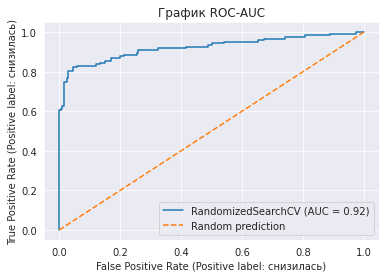

In [119]:
# выведем на экран ROC-кривую методом from_estimator()
RocCurveDisplay.from_estimator(randomized_search, X_test, y_test)
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction')
plt.title("График ROC-AUC")
plt.legend()
plt.show()

ROC-кривая — это график, который отображает динамику качества классификации при разных порогах. Он показывает зависимость между TPR и FRP — промежуточными метриками, которые оценивают число верно классифицированных объектов класса 1 и неверно классифицированных объектов класса 0. Лучшее качество модели — в точке перелома кривой.

### Выводы главы

1. Во время подготовки данных был использован `ColumnTransformer`. Количественные и категориальные признаки обработаны пайплайне раздельно. Для кодирования категориальных признаков использованы два кодировщика, для масштабирования количественных - два скейлера.

2. Обучено четыре модели: `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()` и `SVC()`. Для каждой из них подобраны гиперпараметры. Выбрана метрика ROC-AUC - показателя, который оценивает работу модели более обобщённо, независимо от того, какой порог классификации выбран. 

3. Выберана лучшая модель при использовании заданной метрики. Применена стратегия:

-   использован один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул лучшую модель.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Анализ важности признаков

[К оглавлению](#Оглавление)

1. Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.

2. Сделайте выводы о значимости признаков:

-   какие признаки мало значимы для модели;
-   какие признаки сильнее всего влияют на целевой признак;
-   как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

Однозначную оценку вклада признака в каждый прогноз показывают значения Шепли, их оценивают методом SHAP (SHapley Additive exPlanations). Для этого он вычисляет, как отельный признак помог присвоить модели итоговое значение целевого признака. Значение Шепли изначально рассчитывают для каждого отдельного наблюдения в выборке. Для этого алгоритм SHAP анализирует все возможные комбинации признаков и выявляет вклад каждого из них в предсказания. 

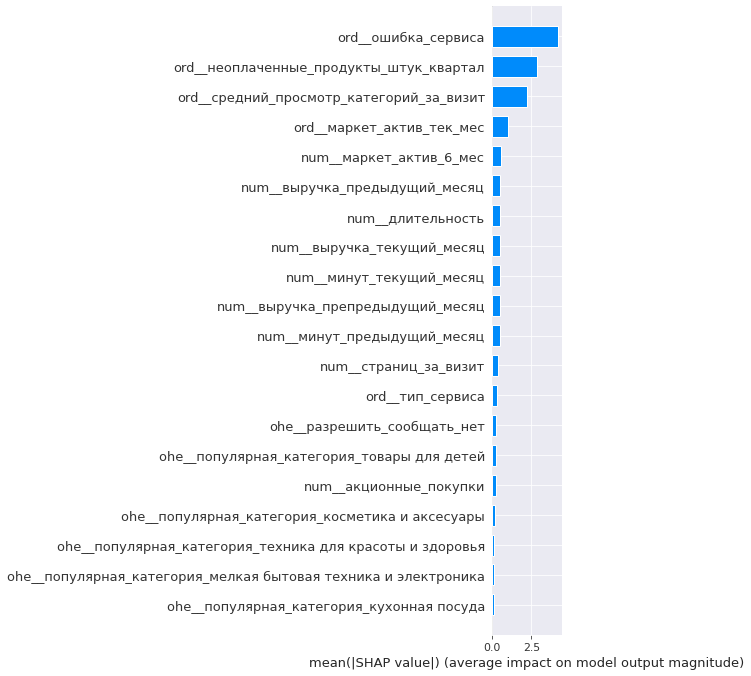

In [120]:
# preprocessor 
X_encoded = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)
# применение лучшей модели 
best_model = randomized_search.best_estimator_['models'].fit(X_encoded, y_train)
explainer = shap.PermutationExplainer(best_model, X_encoded)
# построение shap
shap.summary_plot( X_encoded,feature_names=randomized_search.best_estimator_[:-1].get_feature_names_out(), plot_type='bar')

### Выводы главы

Был построен график важности с помощью метода SHAP. Наиболее важными признаками являются ошибки сервиса, количество неоплаченных продуктов и средний просмотр категорий за визит. Наименее важными являются признаки, связанные с популярными категориями. 

Определение признаков, которые больше всего влияют на модель позволяют сконцентрировать ресурсы бизнеса на наиболее важных задачах, позволяющих улучшить результаты работы. В данном случае это ошибки сервиса. Таким образом, следует постараться уменьшить количество таких ошибок.

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Сегментация покупателей

[К оглавлению](#Оглавление)

1. Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.


2. Выберите группу покупателей и предложите, как увеличить её покупательскую активность:

-   Проведите графическое и аналитическое исследование группы покупателей.
-   Сделайте предложения по работе с сегментом для увеличения покупательской активности.

3. Сделайте выводы о сегментах:

-   какой сегмент вы взяли для дополнительного исследования,
-   какие предложения вы сделали и почему.

In [121]:
df_cust_segm = X_test.copy()

In [122]:
df_cust_segm['покупательская_активность'] = np.array(randomized_search.best_estimator_.predict_proba(X_test)[:,1])

In [123]:
df_cust_segm = df_cust_segm.merge(df_three_month_money,left_index=True, right_index=True)

In [124]:
nice_t(df_cust_segm.sort_values(by='покупательская_активность', ascending=False).head(2))

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность,id,прибыль
201,стандарт,да,0.900000,4,624,0.890000,косметика и аксесуары,1,9,5,1,5678.500000,4726.000000,6194.600000,12.000000,11.000000,0.998490,215549,3.270000
82,стандарт,да,4.000000,4,753,0.890000,товары для детей,2,8,3,2,4599.000000,4098.000000,4959.100000,8.000000,11.000000,0.995840,215430,4.630000


In [140]:
df_cust_segm.shape

(323, 20)

Будем считать, что высокая вероятность снижения покупательской активности больше 0.8. Добавим соответствующий столбец

In [125]:
df_cust_segm['кат_покуп_активность'] = df_cust_segm['покупательская_активность']
df_cust_segm['кат_покуп_активность'] = df_cust_segm['кат_покуп_активность'].apply(lambda x: 
                                                                                  'прежняя' if x < 0.8
                                                                                  else 'снизится')  

In [126]:
nice_t(df_cust_segm.sort_values(by='покупательская_активность', ascending=False).head(2))

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность,id,прибыль,кат_покуп_активность
201,стандарт,да,0.900000,4,624,0.890000,косметика и аксесуары,1,9,5,1,5678.500000,4726.000000,6194.600000,12.000000,11.000000,0.998490,215549,3.270000,снизится
82,стандарт,да,4.000000,4,753,0.890000,товары для детей,2,8,3,2,4599.000000,4098.000000,4959.100000,8.000000,11.000000,0.995840,215430,4.630000,снизится


Как указывал заказчик, необходимо удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Для этого следует выполнить сегментацию покупателей.

Рассмотрим категории товаров

In [127]:
df_cust_segm['популярная_категория'].unique().tolist()

['техника для красоты и здоровья',
 'домашний текстиль',
 'косметика и аксесуары',
 'товары для детей',
 'мелкая бытовая техника и электроника',
 'кухонная посуда']

Возьмём категории `товары для детей` как сегмент покупателей. Так как большинство пользователей пользуются типом подписки `стандарт`, выберем её. Должны быть выбраны пользователи, которые разрешили сообщать о специальных предложениях (именно для них мы такое формируем). 

In [128]:
df_cust_segm_one = df_cust_segm.copy()

In [129]:
df_cust_segm_one = df_cust_segm_one.query('(тип_сервиса == "стандарт") and \
                                           (разрешить_сообщать == "да") and \
                                           (популярная_категория == "товары для детей")')

In [130]:
df_cust_segm_one.shape

(42, 20)

Исследуем более подробно

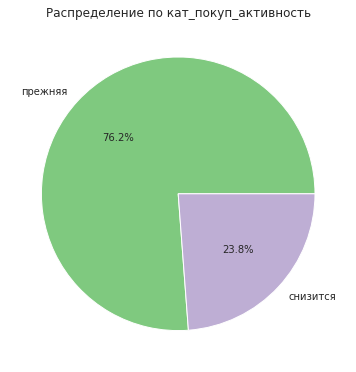

In [131]:
data_category_analyze(df_cust_segm_one, ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория'],  cust_segm_one_x_labels)


Исследование числовых значений


Общая информация о данных (describe)



,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,покупательская_активность,прибыль
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,4798.059524,4810.000000,5113.402381,0.417807,3.950238
std,720.421254,330.888604,681.927869,0.353295,0.937096
min,3432.000000,4098.000000,3412.500000,0.033699,1.570000
25%,4134.250000,4559.500000,4700.650000,0.132232,3.357500
50%,4894.000000,4767.000000,5132.800000,0.240750,3.825000
75%,5388.750000,5011.500000,5486.875000,0.779165,4.600000
max,6158.000000,5624.000000,6905.600000,0.995840,5.700000


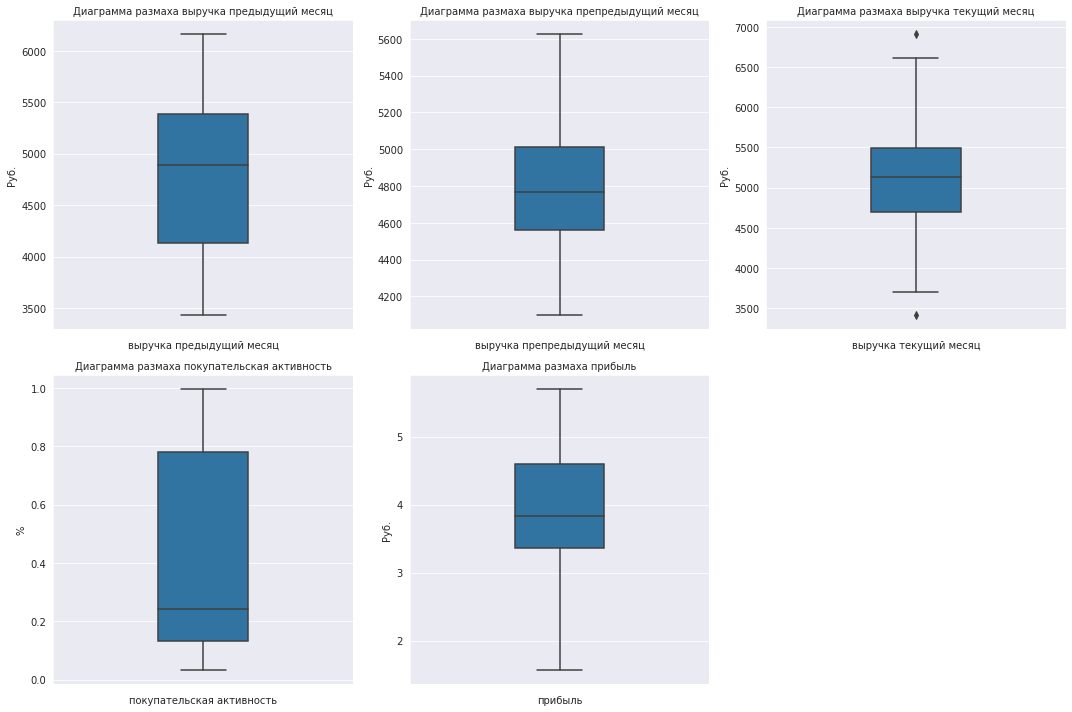

In [132]:
exclude_columns = ['id',
                   'маркет_актив_6_мес',
                   'маркет_актив_тек_мес',
                   'длительность',
                   'страниц_за_визит',
                   'минут_предыдущий_месяц',
                   'минут_текущий_месяц',
                   'акционные_покупки',
                   'средний_просмотр_категорий_за_визит',
                   'ошибка_сервиса',
                   'неоплаченные_продукты_штук_квартал',]

data_numbers_analyze(df_cust_segm_one, exclude_columns, cust_segm_one_x_labels, cust_segm_one_y_labels, 15,  10)

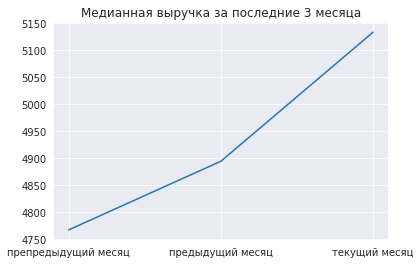

In [133]:
x = ['препредыдущий месяц', 'предыдущий месяц', 'текущий месяц']
y = np.array([df_cust_segm_one['выручка_препредыдущий_месяц'].median(), 
              df_cust_segm_one['выручка_предыдущий_месяц'].median(), 
              df_cust_segm_one['выручка_текущий_месяц'].median()])
plt.title("Медианная выручка за последние 3 месяца")
plt.plot(x, y)
plt.show()

Как видно из полученных графиков, покупательская активность у покупателей из данного сегмента останетя в большинстве прежней. Выручка имеет положительный тренд. 

Исследуем ещё один сегмент покупателей

In [134]:
df_cust_segm_two = df_cust_segm.copy()

In [135]:
df_cust_segm_two = df_cust_segm_one.query('(кат_покуп_активность == "снизится")')

In [136]:
df_cust_segm_two.shape

(10, 20)

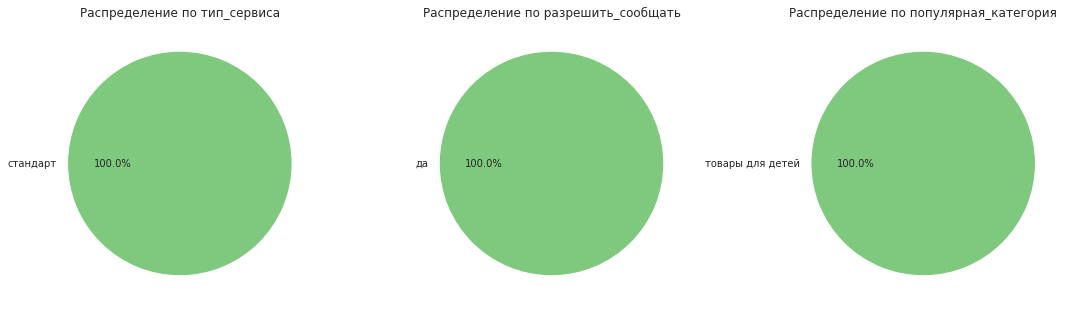

In [137]:
data_category_analyze(df_cust_segm_two, ['кат_покуп_активность'],  cust_segm_one_x_labels)


Исследование числовых значений


Общая информация о данных (describe)



,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,покупательская_активность,прибыль
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4725.700000,4609.900000,4927.720000,0.931297,4.044000
std,793.204583,237.110593,924.410092,0.057722,0.631386
min,3432.000000,4098.000000,3412.500000,0.827270,2.980000
25%,4225.500000,4520.500000,4449.925000,0.885402,3.692500
50%,4916.750000,4665.500000,5041.200000,0.948518,3.880000
75%,5330.750000,4760.250000,5508.525000,0.977632,4.505000
max,5715.500000,4934.000000,6257.600000,0.995840,5.040000


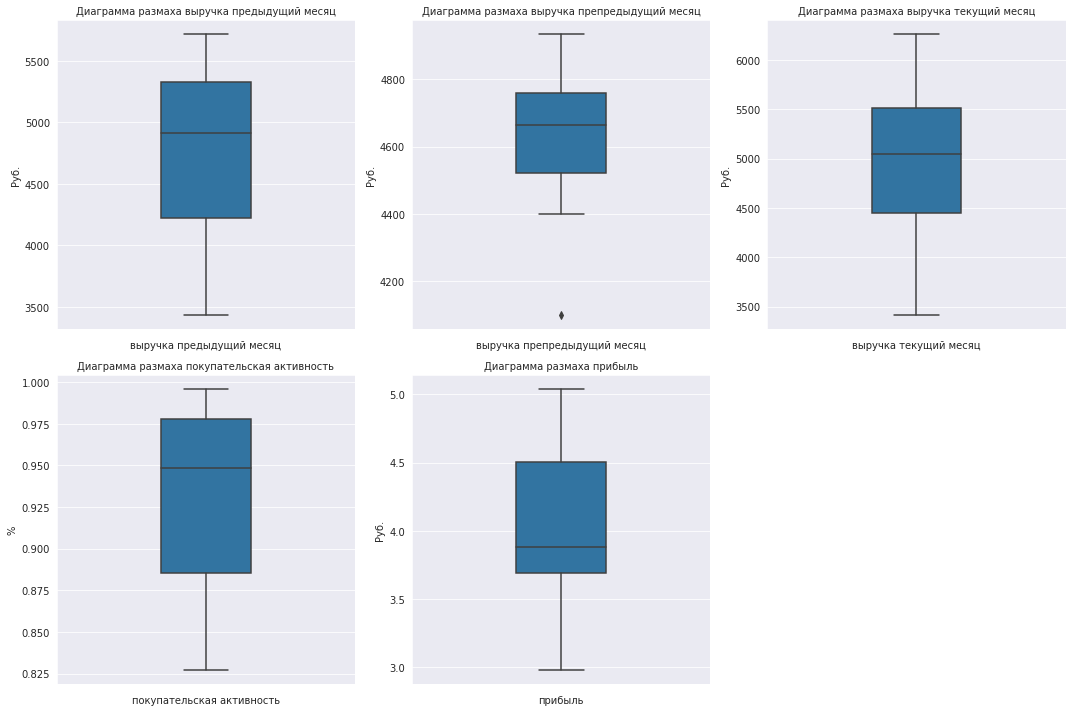

In [138]:
exclude_columns = ['id',
                   'маркет_актив_6_мес',
                   'маркет_актив_тек_мес',
                   'длительность',
                   'страниц_за_визит',
                   'минут_предыдущий_месяц',
                   'минут_текущий_месяц',
                   'акционные_покупки',
                   'средний_просмотр_категорий_за_визит',
                   'ошибка_сервиса',
                   'неоплаченные_продукты_штук_квартал',]

data_numbers_analyze(df_cust_segm_two, exclude_columns, cust_segm_one_x_labels, cust_segm_one_y_labels, 15,  10)

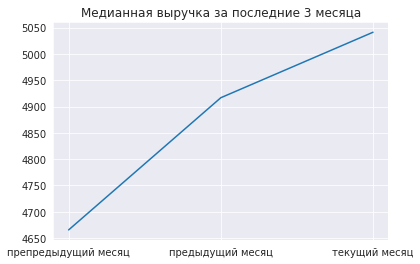

In [139]:
x = ['препредыдущий месяц', 'предыдущий месяц', 'текущий месяц']
y = np.array([df_cust_segm_two['выручка_препредыдущий_месяц'].median(), 
              df_cust_segm_two['выручка_предыдущий_месяц'].median(), 
              df_cust_segm_two['выручка_текущий_месяц'].median()])
plt.title("Медианная выручка за последние 3 месяца")
plt.plot(x, y)
plt.show()

Покупательская активность клиентов, стремящаяся к снижению, имеет характерный сегмент покупателей - с подпиской стандарт, разрешением на рассылки, с любимой категорией товары для детей. Данная категория товаров имеет некоторые особенности - клиенты могут быть более не заинтересованы в приобретении данных товаров, т.к. они больше не являются целевой аудиторией (дети выросли), но для более подробного исследования требуется выборка с данными за более продолжительный период.

### Выводы главы

Выполнена сегментация покупателей с использованием результатов моделирования и данных о прибыльности покупателей. Были проведены графические и аналитическое исследование группы покупателей. Наибольшее внимание следует уделить клиентам, чья покупательская активность прогнозируется к снижению, так как покупательская активность другой группы клиентов останется прежней. Возможно, таким клиентам следует предоставить специальное предложение по  категориям товаров, в которых они заинтересованы или тип улучшенный тип подписки со скидкой

<span style='color:blue'> +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ </span>

## Общий вывод

[К оглавлению](#Оглавление)


В рамках достижения целей проекта были решены следующие **задачи**:
1. Исследована общая информация о данных

2. Выполнена предобработка данных:
    - Обработка пропущенных значений
    - Обработка неявных дубликатов
    - Обработка явных дубликатов
    - Изменение типов данных
    - Выявление и обработка аномальных значений
    

**Замена наименований столбцов**:
1. market_file.csv
    - Покупательская активность => Покупательская_активность
    - Тип сервиса => Тип_сервиса
    - Разрешить сообщать => Разрешить_сообщать
    - Все столбцы приведены к нижнему регистру
2. market_money.csv
    - Все столбцы приведены к нижнему регистру
3. market_time.csv
    - Все столбцы приведены к нижнему регистру
4. money.csv
    - Все столбцы приведены к нижнему регистру
      
**Обработка пропущенных значений**:
- Пропущенных значений не обнаружено

**Преобразование типов данных**

**market_file.csv**

- маркет_актив_6_мес: object => float64
- акционные_покупки:  object => float64

**market_money.csv** 
- выручка:   object => float64

**market_time.csv**
- преобразование типов данных не требуется

**money.csv**
- преобразование типов данных не требуется

**Обработка неявных дубликатов:**

**market_file.csv**
Были обнаружены и исправлены дубликаты в столбцах:

- `тип_сервиса`:`стандартт` => `стандарт`

**market_money.csv**

- дубликатов не обнаружено

**market_time.csv**

Были обнаружены и исправлены опечатки в столбцах:

- `период`: `предыдцщий_месяц` => `предыдущий_месяц`

**money.csv**
- Строковые данные отсутствуют


3. Выполнен исследовательский анализ данных

**market_file.csv**
Как видно из круговых диаграмм, покупательская активность, в основном, остаётся на прежнем уровне.
Тем не менее, процент пользователей, покупательская активность которых снизилась составляет 38,3%.
В основном, пользователи пользуются типом подписки `стандарт`. Большинство пользователей дали согласие на 
предоставление специальных предложений. Наиболее популярными категориями товаров являются товары для детей,
домашний текстиль, косметика и аксессуары. 
Анализ гистограмм размаха показал, что в данных присутствуют выбивающиеся значения (выбросы), но , 
в целом, они лежат в пределах нормы, исключение каких-либо данных не требуется.

Значение всех признаков не имеют нормального распределения

**market_money.csv**

Как видно из круговой диаграммы, распределение пользователей по периодам, за который зафикирована выручка, одинаковое
При анализе числовых данных было обнаружено аномальное значение, заменено на медианное. Распределение по столбцу `выручка` не нормальное.

**market_time.csv**

Круговая диаграмма показывает, что количество пользователей одинаково распределено по месяцам.
Выбросов в данных не имеется, распределение по столбцу `продолжительность_посещения` не нормальное.

**money.csv**

Категориальные данные отсутствуют, анализ числовых данных показал отсутствие аномальных значений, распределение по столбцу `прибыль` нормальное

**Также** были выявлены покупатели с ненулевой покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

4. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

5. Нужно собрать данные по клиентам по следующим группам:
    -   Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    -   Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    -   Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    -   Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.    
    
6. Построена модель, которая предсказывает вероятность снижения покупательской активности клиента.

- Для поиска лучшей модели был применен пайплайн (конвейер). Пайплайн или конвейер, — это инструмент, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества. Термины «пайплайн» и «конвейер» обычно используются как синонимы. Для выбора лучшей модели был применен случайный поиск с помощью `RandomizedSearchCV`

- Во время подготовки данных был использован `ColumnTransformer`. Количественные и категориальные признаки обработаны пайплайне раздельно. Для кодирования категориальных признаков использованы два кодировщика, для масштабирования количественных - два скейлера.

- Обучено четыре модели: `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()` и `SVC()`. Для каждой из них подобраны гиперпараметры. Выбрана метрика ROC-AUC - показателя, который оценивает работу модели более обобщённо, независимо от того, какой порог классификации выбран. 

- Выбрана лучшая модель при использовании заданной метрики. Применена стратегия:

    -   использован один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул лучшую модель.
    
- Параметры лучшей модели LogisticRegression:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум'],
                                                                                              [3,4,5],
                                                                                              [1,2,3,4,5,6],
                                                                                              [0,1,2,3,4,5,6,7,8,9,10],
                                                                                              [0,1,2,...
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'страниц_за_визит',
                                                   'выручка_препредыдущий_месяц',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', LogisticRegression(max_iter=6000, random_state=42))])

Метрика лучшей модели на тренировочной выборке: 0.90

Метрика ROC-AUC на тестовой выборке: 0.92

7. Выполнена сегментация покупателей с использованием результатов моделирования и данных о прибыльности покупателей. Были проведены графические и аналитическое исследование группы покупателей. Наибольшее внимание следует уделить клиентам, чья покупательская активность прогнозируется к снижению, так как покупательская активность другой группы клиентов останется прежней. Возможно, таким клиентам следует предоставить специальное предложение по  категориям товаров, в которых они заинтересованы или тип улучшенный тип подписки со скидкой


В качестве исходных данных были предоставлены следующие данные:
- market_file.csv
- market_money.csv
- market_time.csv
- money.csv